In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
first_data = pd.read_csv('ex2data1.txt',header=None,names=['Fisrt Score', 'Second Score', 'Admitted'])
print(first_data.head())

   Fisrt Score  Second Score  Admitted
0    34.623660     78.024693         0
1    30.286711     43.894998         0
2    35.847409     72.902198         0
3    60.182599     86.308552         1
4    79.032736     75.344376         1


In [3]:
print(first_data.describe())

       Fisrt Score  Second Score    Admitted
count   100.000000    100.000000  100.000000
mean     65.644274     66.221998    0.600000
std      19.458222     18.582783    0.492366
min      30.058822     30.603263    0.000000
25%      50.919511     48.179205    0.000000
50%      67.032988     67.682381    1.000000
75%      80.212529     79.360605    1.000000
max      99.827858     98.869436    1.000000


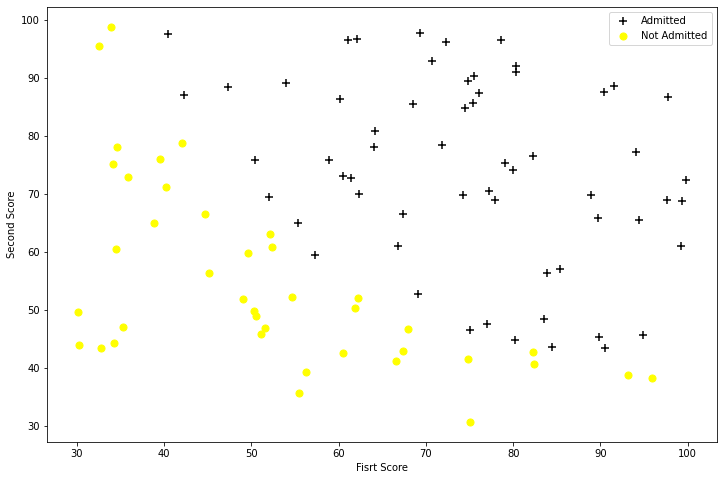

In [4]:
positive = first_data[first_data['Admitted']==1]
negtive = first_data[first_data['Admitted']==0]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Fisrt Score'],positive['Second Score'],s=50,c='black',marker='+',label='Admitted')
ax.scatter(negtive['Fisrt Score'],negtive['Second Score'],s=50,c='yellow',marker='o',label='Not Admitted')
ax.legend(loc='best')
ax.set_xlabel('Fisrt Score')
ax.set_ylabel('Second Score')
plt.show()

In [5]:
def hTheta(X, theta):
    return X * theta.T
def sigmoid(z):
    return 1 / (1+np.exp(-z))

# Test hTheta

In [6]:
test_X = np.mat([[1,2,3],[4,5,6]])
test_theta = np.mat([[1,1,1]])
print(hTheta(test_X,test_theta))

[[ 6]
 [15]]


# Test sigmoid

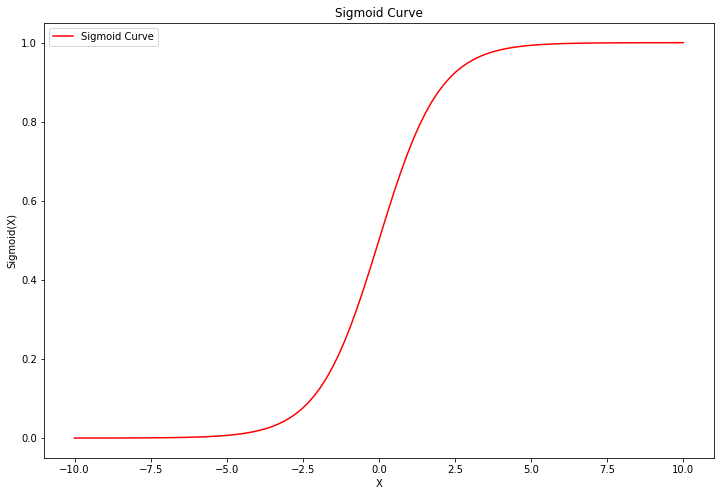

In [7]:
test_x = np.linspace(-10,10,100)
test_y = sigmoid(test_x)
_, ax = plt.subplots(figsize=(12,8))
ax.plot(test_x,test_y,c='r',label='Sigmoid Curve')
ax.legend(loc='best')
ax.set_xlabel('X')
ax.set_ylabel('Sigmoid(X)')
ax.set_title('Sigmoid Curve')
plt.show()

# test costFunction

In [8]:
first_data.insert(0,'Ones',1)
cols = first_data.shape[-1]
X = np.mat(first_data.iloc[:,:cols-1])
y = np.mat(first_data.iloc[:,cols-1:cols])

In [9]:
def costFunction(X,y,theta):
    J = np.sum(-np.array(y) * np.array(np.log(sigmoid(hTheta(X, theta)))) - np.array(1 - y) * np.array(np.log(1 - sigmoid(hTheta(X, theta)))))/len(y)
    return J
def efficentCostFunction(X,y,theta):
    j_theta = -y.T * np.log(sigmoid(hTheta(X, theta)))-(1-y).T * np.log(1 - sigmoid(hTheta(X, theta)))
    return (j_theta / len(y)).flatten()

In [10]:
theta = np.mat([[0.,0.,0.]])
print(costFunction(X,y,theta))
print(efficentCostFunction(X,y,theta))

0.6931471805599453
[[0.69314718]]


In [11]:
def gradient(X,y,theta):
    temp_theta = np.mat(np.zeros(theta.shape))
    error = sigmoid(hTheta(X,theta)) - y
    for j in range(X.shape[-1]):
        temp_theta[0,j] = error.T * X[:,j] / len(X)
    return temp_theta

# Test gradient

In [12]:
print(gradient(X,y,theta))

[[ -0.1        -12.00921659 -11.26284221]]


In [13]:
def gradientDescent(X,y,theta,alpha,iters):
    loss_list = []
    update_theta = theta.copy()
    for _ in range(iters):
        update_theta -= alpha * gradient(X,y,update_theta)
        loss = costFunction(X,y,update_theta)
        loss_list.append(loss)
    return update_theta, loss_list

In [14]:
theta,loss_list = gradientDescent(X,y,theta,0.001,500)
print(theta)

[[-0.03477121  0.01066652  0.0007217 ]]


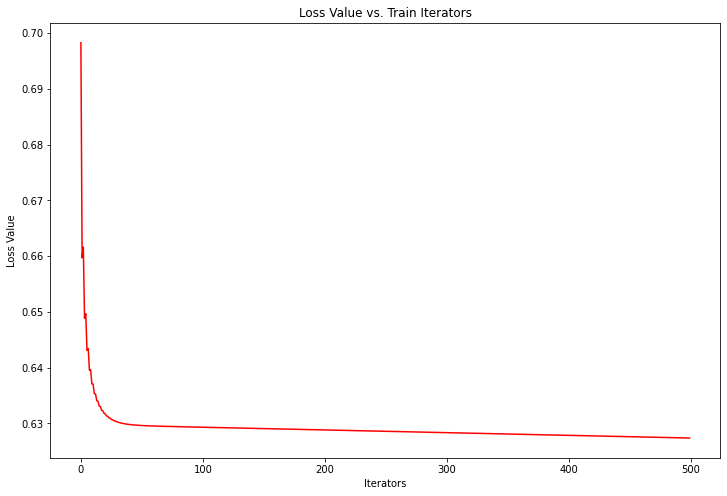

In [15]:
_, ax = plt.subplots(figsize=(12,8))
ax.plot(loss_list,c='r',label='Loss Curve')
ax.set_xlabel('Iterators')
ax.set_ylabel('Loss Value')
ax.set_title('Loss Value vs. Train Iterators')
plt.show()

# scipy优化

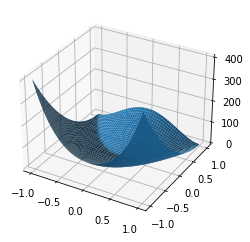

In [16]:
import scipy.optimize as op
import matplotlib.pyplot as plt
x = np.linspace(-1,1,50)
X,Y = np.meshgrid(x,x)
ax = plt.subplot(111, projection='3d')
ax.plot_surface(X,Y,op.rosen([X, Y]))
plt.show()

In [17]:
def cost(theta,X,y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [18]:
cols = first_data.shape[1]
X = first_data.iloc[:,:cols-1]
y = first_data.iloc[:,cols-1:cols]
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [19]:
print(cost(theta,X,y))

0.6931471805599453


In [20]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [21]:
print(gradient(theta,X,y))

[ -0.1        -12.00921659 -11.26284221]


In [22]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))

In [23]:
cost(result[0],X,y)

0.20349770158947447

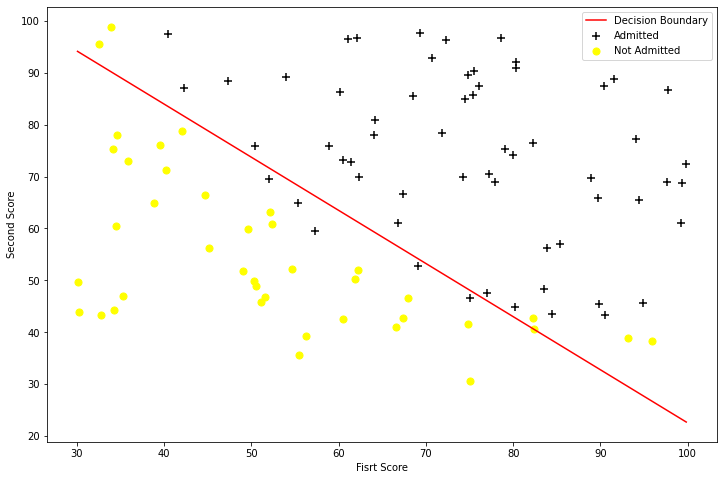

In [24]:
x = np.linspace(first_data['Fisrt Score'].min(),first_data['Fisrt Score'].max(),100)
f = -(result[0][0]/result[0][2] + result[0][1]/result[0][2]*x)
_,ax = plt.subplots(figsize=(12,8))
ax.plot(x,f,c='r',label='Decision Boundary')
ax.scatter(positive['Fisrt Score'],positive['Second Score'],s=50,c='black',marker='+',label='Admitted')
ax.scatter(negtive['Fisrt Score'],negtive['Second Score'],s=50,c='yellow',marker='o',label='Not Admitted')
ax.legend(loc='best')
ax.set_xlabel('Fisrt Score')
ax.set_ylabel('Second Score')
plt.show()

In [25]:
def predict(theta,X):
    theta = np.matrix(theta)
    X = np.matrix(X)
    p = sigmoid(X * theta.T)
    pred = np.zeros(p.shape)
    pred[p > 0.5] = 1
    return pred

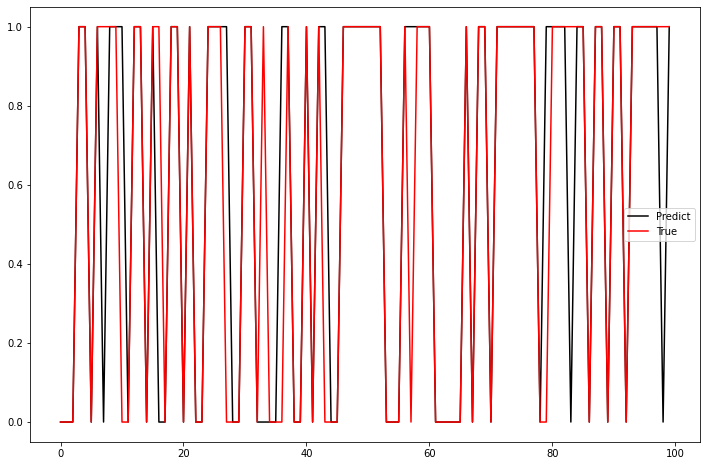

In [26]:
theta = result[0]
predict_y = predict(theta,X)
_, ax = plt.subplots(figsize=(12,8))
ax.plot(predict_y,c='black',label='Predict')
ax.plot(y,c='red',label='True')
ax.legend(loc='best')
plt.show()

In [27]:
label = np.array(np.zeros(y.shape))
label[predict_y == y] = 1
accuracy = np.sum(label) / len(label)
print(accuracy)

0.89


# 2 Regularized logistic regression

In [28]:
second_data = pd.read_csv('ex2data2.txt',header=None,names=['Test1','Test2','Accepted'])

In [29]:
print(second_data.head())

      Test1    Test2  Accepted
0  0.051267  0.69956         1
1 -0.092742  0.68494         1
2 -0.213710  0.69225         1
3 -0.375000  0.50219         1
4 -0.513250  0.46564         1


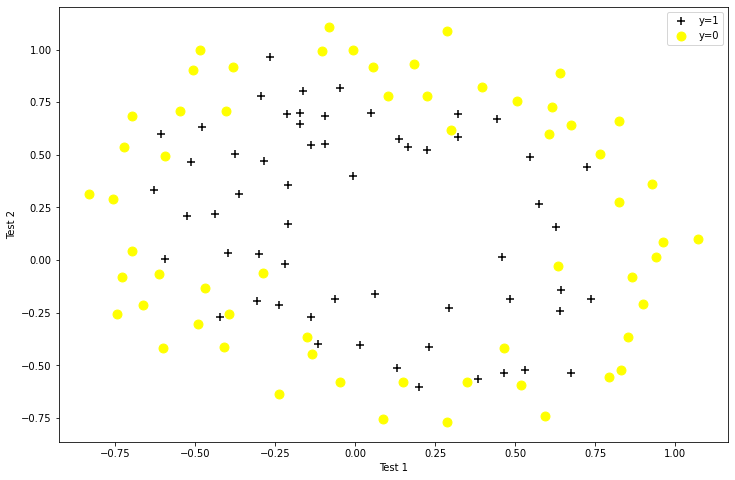

In [30]:
positive = second_data[second_data['Accepted'] == 1]
negtive = second_data[second_data['Accepted'] == 0]
_, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test1'],positive['Test2'],c='black',s=80,marker='+',label='y=1')
ax.scatter(negtive['Test1'],negtive['Test2'],c='yellow',s=80,marker='o',label='y=0')
ax.legend(loc='best')
ax.set_xlabel('Test 1')
ax.set_ylabel('Test 2')
plt.show()

## 2.3 Cost function

### 扩充维度

In [31]:
def expandFeatures(dataset, degree):
    ret = dataset.copy()
    x1 = ret['Test1']
    x2 = ret['Test2']
    for i in range(degree+1):
        for j in range(i):
            ret['F'+str(i-j-1)+str(j)] = np.power(x1,i-j-1) * np.power(x2,j)
    ret.drop('Test1',axis=1, inplace=True)
    ret.drop('Test2',axis=1, inplace=True)
    return ret

In [32]:
expand_data = expandFeatures(second_data,5)
print(expand_data.shape)

(118, 16)


In [33]:
X = expand_data.iloc[:,1:]
y = expand_data.iloc[:,0:1]
X = np.array(X.values)
y = np.array(y.values)

### 正则化代价函数

In [34]:
def cost(theta, X, y, learningRate=1):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = -y.T * np.log(sigmoid(X * theta.T))
    second = (1 - y).T * np.log(1 - sigmoid(X * theta.T))
    reg = (learningRate / 2) * theta * theta.T
    return np.sum(first - second + reg) / len(X)

In [35]:
theta = np.zeros((1,X.shape[1]))
print(cost(theta,X,y))

0.6931471805599454


In [36]:
def gradientReg(theta, X, y, learningRate=1):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    error = sigmoid(X * theta.T) - y
    for i in range(parameters):
        term = error.T * X[:,i]
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    return grad

In [37]:
print(gradientReg(theta,X,y))

[8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02]


In [60]:
def gradientDescent(theta,X,y,alpha,iters,learningRate):
    update_theta = theta.copy()
    loss_list = []
    for _ in range(iters):
        loss_list.append(cost(update_theta,X,y,learningRate))
        grad = gradientReg(update_theta,X,y,learningRate)
        update_theta -= alpha * grad
    return update_theta, loss_list

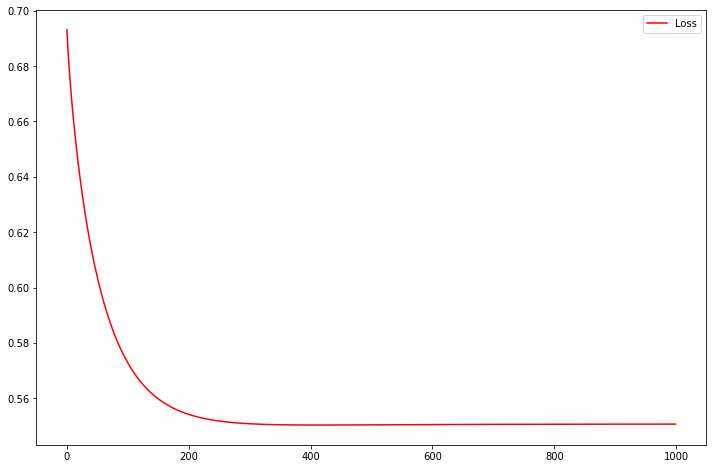

In [61]:
theta = np.zeros((1,X.shape[1]))
update_theta,loss_list = gradientDescent(theta,X,y,0.5,1000,1)
_, ax = plt.subplots(figsize=(12,8))
ax.plot(loss_list,c='r',label='Loss')
ax.legend(loc='best')
plt.show() 

In [56]:
print(cost(update_theta,X,y))

0.5506453112183376


In [57]:
predict_y = predict(update_theta,X)
label = predict_y[predict_y==y]
accuracy = len(label) / len(predict_y)
print(accuracy)

0.8220338983050848


In [42]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradientReg, args=(X, y))

In [43]:
print(result)

(array([ 1.26734643,  0.57167207,  1.12226129, -2.1786962 , -0.93168028,
       -1.56718351, -0.02379401, -0.36727322, -0.35026427, -0.49393547,
       -1.66825184, -0.09292422, -0.62235723, -0.26399633, -1.56584903]), 55, 4)


In [44]:
print(cost(result[0],X,y))

0.5504881323424589


In [45]:
predict_y = predict(result[0],X)
label = predict_y[predict_y==y]
accuracy = len(label) / len(predict_y)
print(accuracy)

0.8389830508474576


In [81]:
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l2',C=1)
model.fit(X,y.ravel())

LogisticRegression(C=1)

In [82]:
model.score(X,y.ravel())

0.8220338983050848